In [2]:
import pandas as pd
import numpy as np
#data = pd.read_csv(r"C:\Users\HP\Downloads\Disease_Prediction.csv", sep=';')
#data.head()
#load the dataset
data = pd.read_csv(r"C:\Users\HP\Downloads\project-data.csv",sep=';') # No index column will be displayed
data.head()

category  age sex  albumin  alkaline_phosphatase  \
0   no_disease   32   m     38.5                  52.5   
1   no_disease   32   m     38.5                  70.3   
2   no_disease   32   m     46.9                  74.7   
3   no_disease   32   m     43.2                  52.0   
4   no_disease   32   m     39.2                  74.1   

   alanine_aminotransferase  aspartate_aminotransferase  bilirubin  \
0                       7.7                        22.1        7.5   
1                      18.0                        24.7        3.9   
2                      36.2                        52.6        6.1   
3                      30.6                        22.6       18.9   
4                      32.6                        24.8        9.6   

   cholinesterase  cholesterol  creatinina  gamma_glutamyl_transferase   \
0            6.93         3.23       106.0                         12.1   
1           11.17         4.80        74.0                         15.6   
2            8.84         5.20        86.0                         33.2   
3            7.33         4.74        80.0                         33.8   
4            9.15         4.32        76.0                         29.9   

  protein     
0         69  
1       76.5  
2       79.3  
3       75.7  
4       68.7

In [3]:
data.dtypes

category                        object
age                              int64
sex                             object
albumin                        float64
alkaline_phosphatase           float64
alanine_aminotransferase       float64
aspartate_aminotransferase     float64
bilirubin                      float64
cholinesterase                 float64
cholesterol                    float64
creatinina                     float64
gamma_glutamyl_transferase     float64
protein                         object
dtype: object

In [4]:
data.shape

(615, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   category                     615 non-null    object 
 1   age                          615 non-null    int64  
 2   sex                          615 non-null    object 
 3   albumin                      614 non-null    float64
 4   alkaline_phosphatase         597 non-null    float64
 5   alanine_aminotransferase     614 non-null    float64
 6   aspartate_aminotransferase   615 non-null    float64
 7   bilirubin                    615 non-null    float64
 8   cholinesterase               615 non-null    float64
 9   cholesterol                  605 non-null    float64
 10  creatinina                   615 non-null    float64
 11  gamma_glutamyl_transferase   615 non-null    float64
 12  protein                      615 non-null    object 
dtypes: float64(9), int64

In [6]:
data.columns

Index(['category', 'age', 'sex', 'albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin',
       'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase ', 'protein   '],
      dtype='object')

In [7]:
#Rename the columns by removing the extra spaces
data = data.rename({'gamma_glutamyl_transferase ':'gamma_glutamyl_transferase'}, axis=1)
data = data.rename({'protein   ':'protein'}, axis=1)

In [8]:
data.describe()

age     albumin  alkaline_phosphatase  alanine_aminotransferase  \
count  615.000000  614.000000            597.000000                614.000000   
mean    47.408130   41.620195             68.283920                 28.450814   
std     10.055105    5.780629             26.028315                 25.469689   
min     19.000000   14.900000             11.300000                  0.900000   
25%     39.000000   38.800000             52.500000                 16.400000   
50%     47.000000   41.950000             66.200000                 23.000000   
75%     54.000000   45.200000             80.100000                 33.075000   
max     77.000000   82.200000            416.600000                325.300000   

       aspartate_aminotransferase   bilirubin  cholinesterase  cholesterol  \
count                  615.000000  615.000000      615.000000   605.000000   
mean                    34.786341   11.396748        8.196634     5.368099   
std                     33.090690   19.673150        2.205657     1.132728   
min                     10.600000    0.800000        1.420000     1.430000   
25%                     21.600000    5.300000        6.935000     4.610000   
50%                     25.900000    7.300000        8.260000     5.300000   
75%                     32.900000   11.200000        9.590000     6.060000   
max                    324.000000  254.000000       16.410000     9.670000   

        creatinina  gamma_glutamyl_transferase  
count   615.000000                  615.000000  
mean     81.287805                   39.533171  
std      49.756166                   54.661071  
min       8.000000                    4.500000  
25%      67.000000                   15.700000  
50%      77.000000                   23.300000  
75%      88.000000                   40.200000  
max    1079.100000                  650.900000

<Axes: >

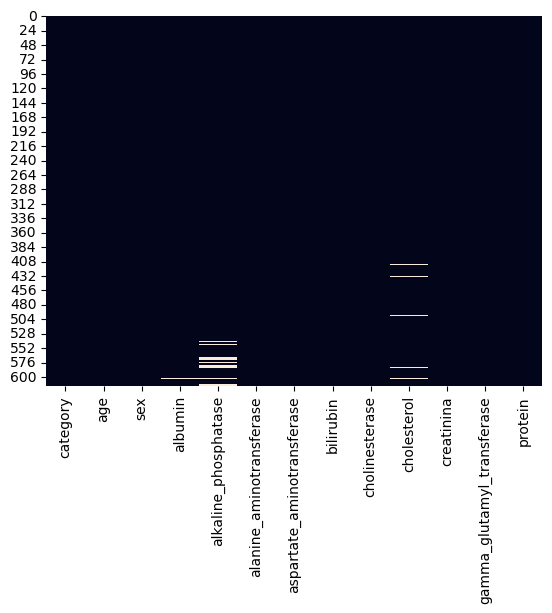

In [9]:
#Missing values and Imputation
import seaborn as sns
cols= data.columns
sns.heatmap(data[cols].isnull(), cbar=False)

In [11]:
data.isnull().sum()

category                       0
age                            0
sex                            0
albumin                        1
alkaline_phosphatase          18
alanine_aminotransferase       1
aspartate_aminotransferase     0
bilirubin                      0
cholinesterase                 0
cholesterol                   10
creatinina                     0
gamma_glutamyl_transferase     0
protein                        0
dtype: int64

In [12]:
# Replace 'NA' strings with NaN
data.replace('NA', pd.NA, inplace=True)

#Mean Imputation
data['albumin'] = data['albumin'].fillna(data['albumin'].mean())
data['alkaline_phosphatase'] = data['alkaline_phosphatase'].fillna(data['alkaline_phosphatase'].mean())
data['alanine_aminotransferase'] = data['alanine_aminotransferase'].fillna(data['alanine_aminotransferase'].mean())
data['cholesterol'] = data['cholesterol'].fillna(data['cholesterol'].mean())

In [13]:
data.isnull().sum()

category                      0
age                           0
sex                           0
albumin                       0
alkaline_phosphatase          0
alanine_aminotransferase      0
aspartate_aminotransferase    0
bilirubin                     0
cholinesterase                0
cholesterol                   0
creatinina                    0
gamma_glutamyl_transferase    0
protein                       0
dtype: int64

In [14]:
# Convert the column to numeric, coercing any non-convertible values to NaN
data['protein'] = pd.to_numeric(data['protein'], errors='coerce')

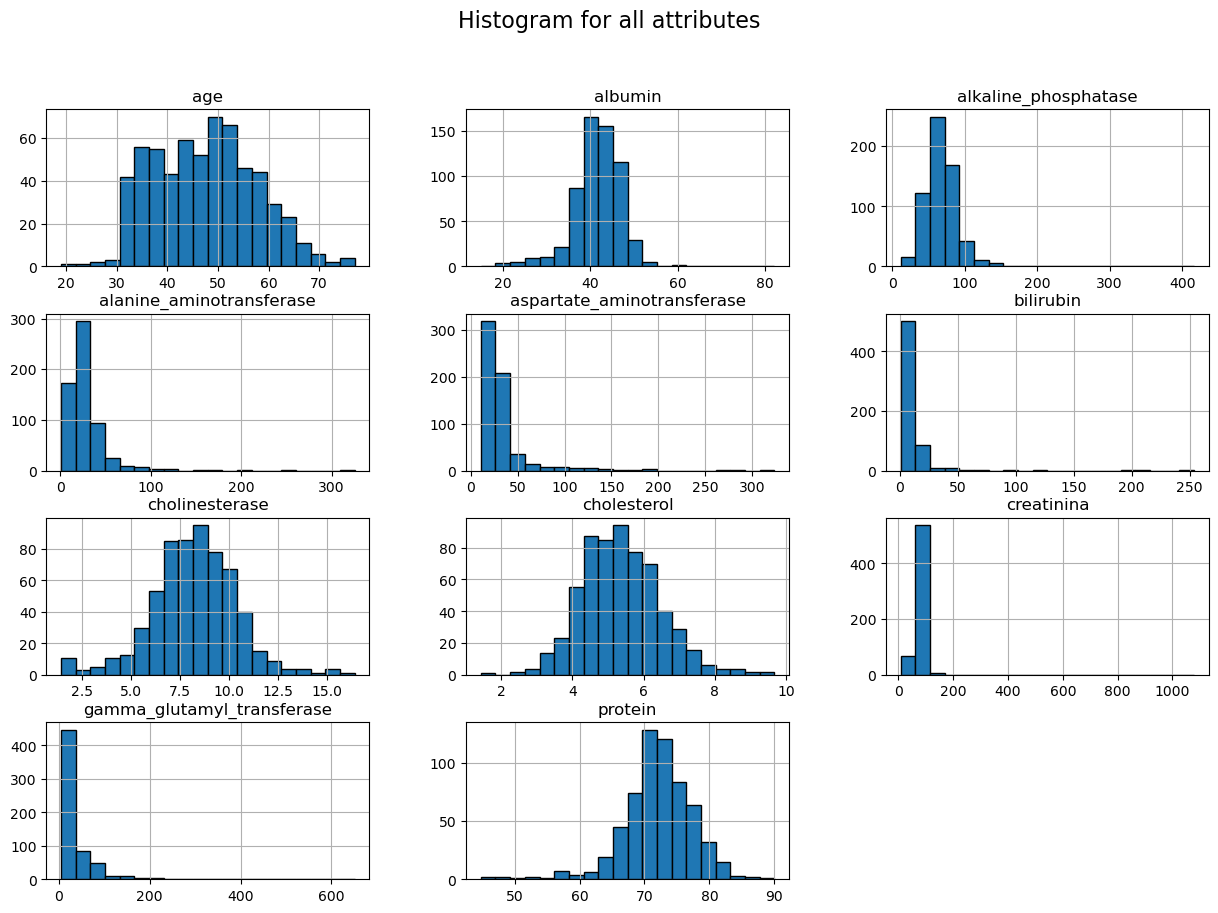

In [15]:
#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
data.hist(bins=20, figsize=(15,10), edgecolor='black')
plt.suptitle('Histogram for all attributes', fontsize=16)
plt.show()

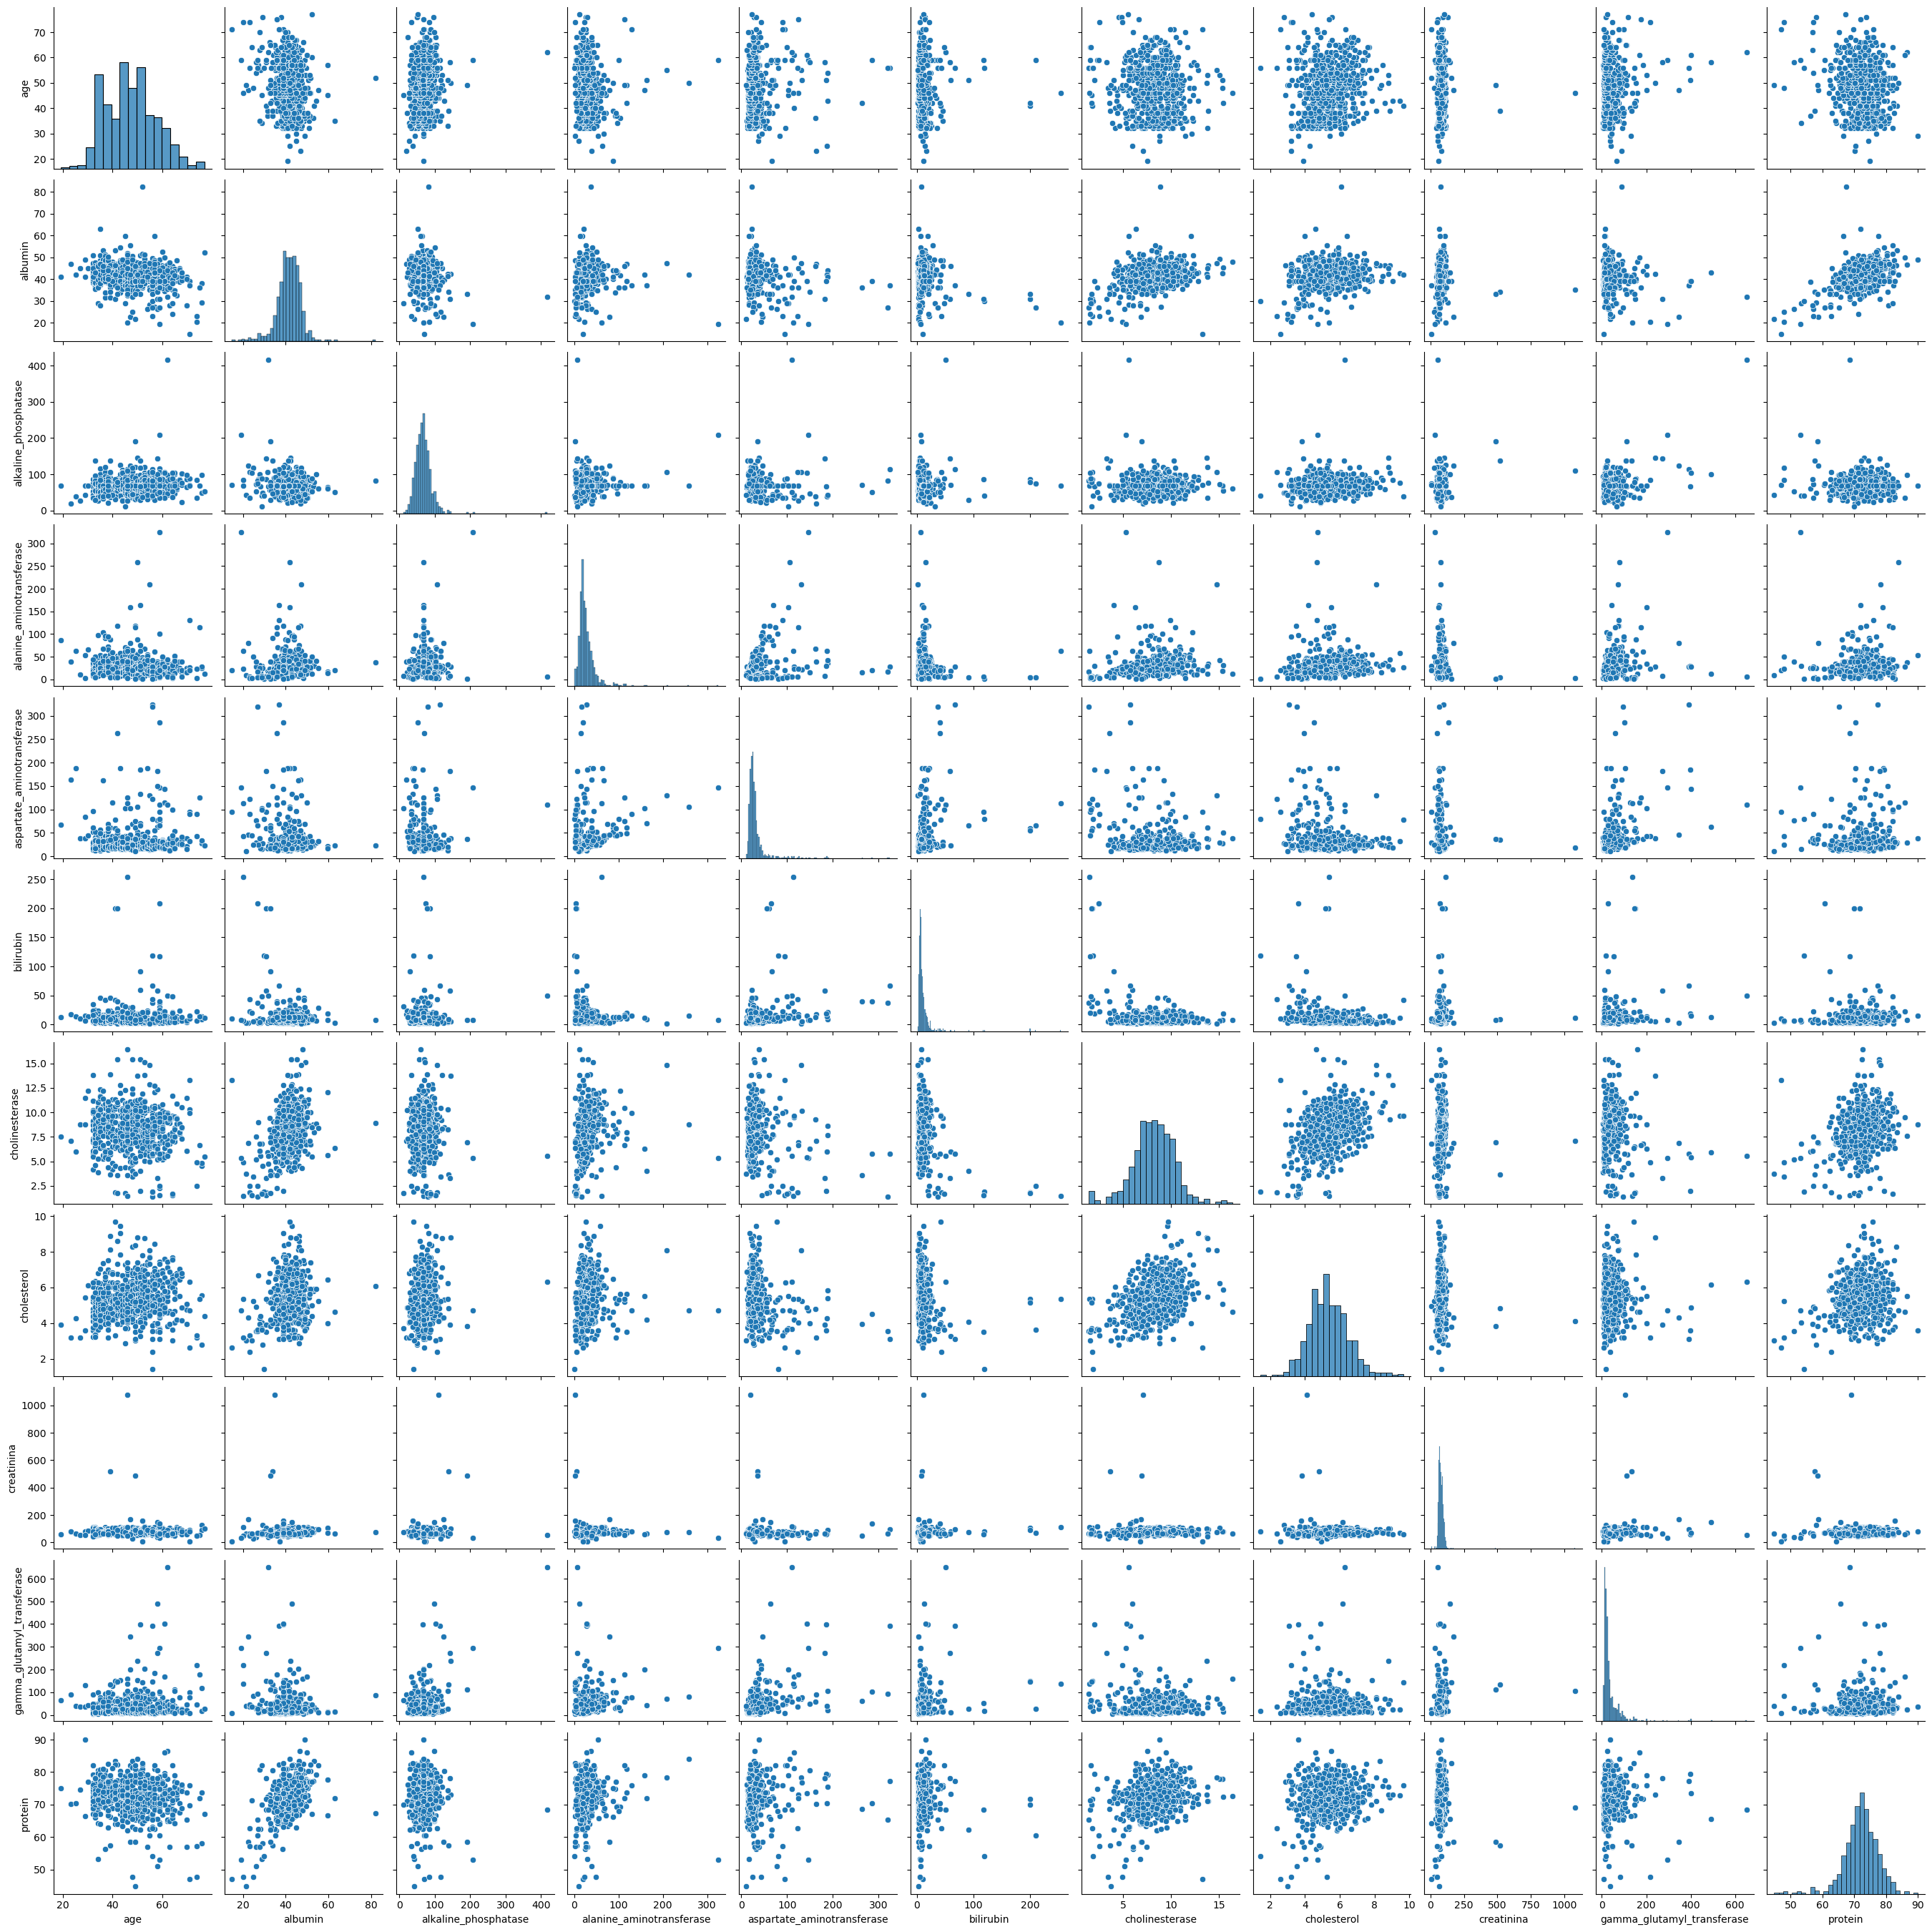

In [16]:
sns.pairplot(data)
plt.show()

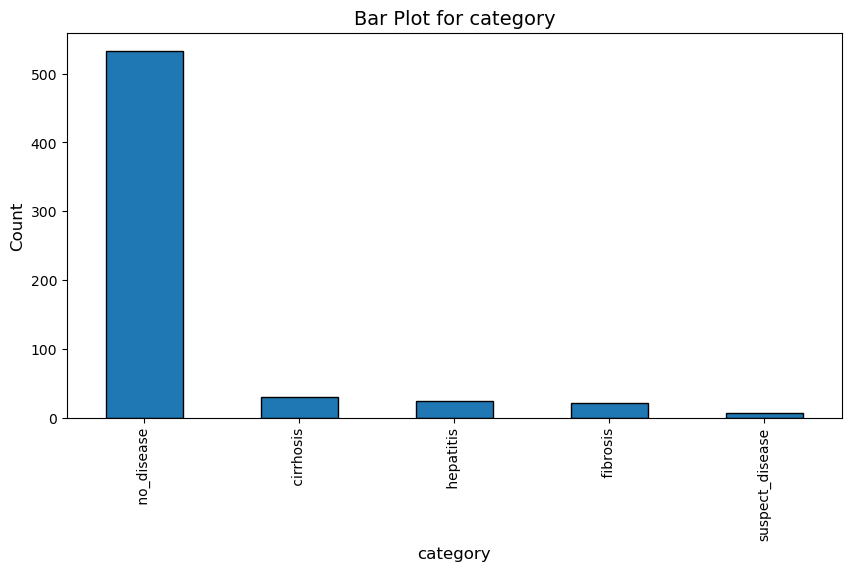

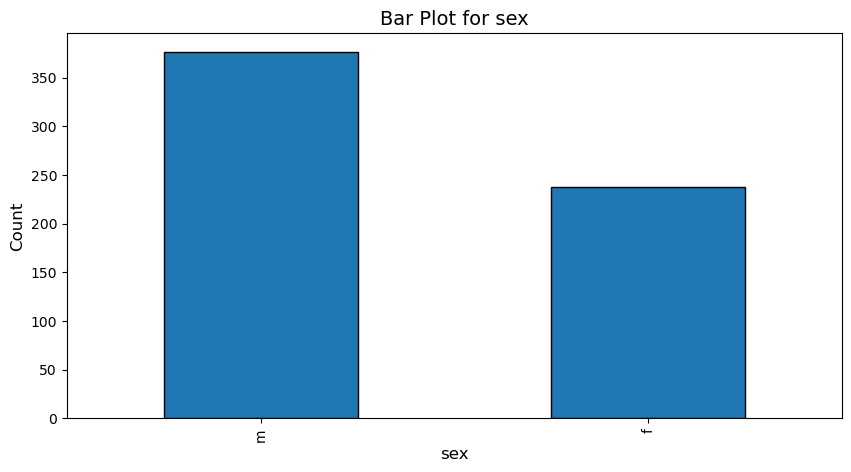

In [17]:
# Plot bar plots for each categorical/discrete attribute
for col in data.columns:
    if data[col].dtype == 'object' or data[col].nunique() < 20:  # Categorical or few unique values
        plt.figure(figsize=(10, 5))
        data[col].value_counts().plot(kind='bar', edgecolor='black')
        plt.title(f'Bar Plot for {col}', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.show()


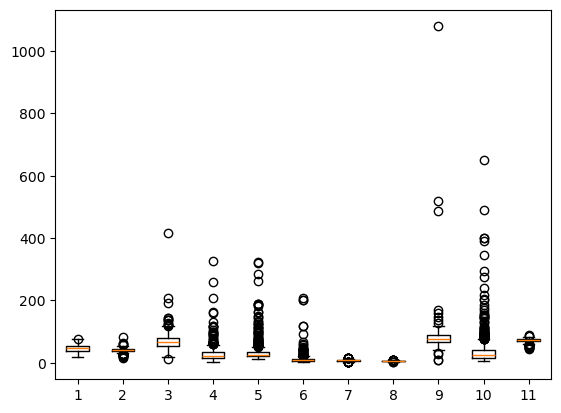

In [18]:
# Box plot to detect outliers
data_box = data.select_dtypes(include=np.number).dropna() #Selects only numeric cols before dropping na
plt.boxplot(data_box)
plt.show()

In [19]:
# One-Hot Encoding technique
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_data=pd.DataFrame(enc.fit_transform(data[['sex']], [['category']]).toarray())
enc_data

0    1
0    0.0  1.0
1    0.0  1.0
2    0.0  1.0
3    0.0  1.0
4    0.0  1.0
..   ...  ...
610  1.0  0.0
611  1.0  0.0
612  1.0  0.0
613  1.0  0.0
614  1.0  0.0

[615 rows x 2 columns]

In [21]:
data_enc=pd.get_dummies(data, columns= ['category', 'sex'])
data_enc

age  albumin  alkaline_phosphatase  alanine_aminotransferase  \
0     32     38.5              52.50000                       7.7   
1     32     38.5              70.30000                      18.0   
2     32     46.9              74.70000                      36.2   
3     32     43.2              52.00000                      30.6   
4     32     39.2              74.10000                      32.6   
..   ...      ...                   ...                       ...   
610   62     32.0             416.60000                       5.9   
611   64     24.0             102.80000                       2.9   
612   64     29.0              87.30000                       3.5   
613   46     33.0              68.28392                      39.0   
614   59     36.0              68.28392                     100.0   

     aspartate_aminotransferase  bilirubin  cholinesterase  cholesterol  \
0                          22.1        7.5            6.93         3.23   
1                          24.7        3.9           11.17         4.80   
2                          52.6        6.1            8.84         5.20   
3                          22.6       18.9            7.33         4.74   
4                          24.8        9.6            9.15         4.32   
..                          ...        ...             ...          ...   
610                       110.3       50.0            5.57         6.30   
611                        44.4       20.0            1.54         3.02   
612                        99.0       48.0            1.66         3.63   
613                        62.0       20.0            3.56         4.20   
614                        80.0       12.0            9.07         5.30   

     creatinina  gamma_glutamyl_transferase  protein  category_ cirrhosis  \
0         106.0                        12.1     69.0                False   
1          74.0                        15.6     76.5                False   
2          86.0                        33.2     79.3                False   
3          80.0                        33.8     75.7                False   
4          76.0                        29.9     68.7                False   
..          ...                         ...      ...                  ...   
610        55.7                       650.9     68.5                 True   
611        63.0                        35.9     71.3                 True   
612        66.7                        64.2     82.0                 True   
613        52.0                        50.0     71.0                 True   
614        67.0                        34.0     68.0                 True   

     category_ fibrosis  category_ hepatitis  category_ no_disease  \
0                 False                False                  True   
1                 False                False                  True   
2                 False                False                  True   
3                 False                False                  True   
4                 False                False                  True   
..                  ...                  ...                   ...   
610               False                False                 False   
611               False                False                 False   
612               False                False                 False   
613               False                False                 False   
614               False                False                 False   

     category_suspect_disease  sex_f  sex_m  
0                       False  False   True  
1                       False  False   True  
2                       False  False   True  
3                       False  False   True  
4                       False  False   True  
..                        ...    ...    ...  
610                     False   True  False  
611                     False   True  False  
612                     False   True  False  
613                     False   True  False  
614

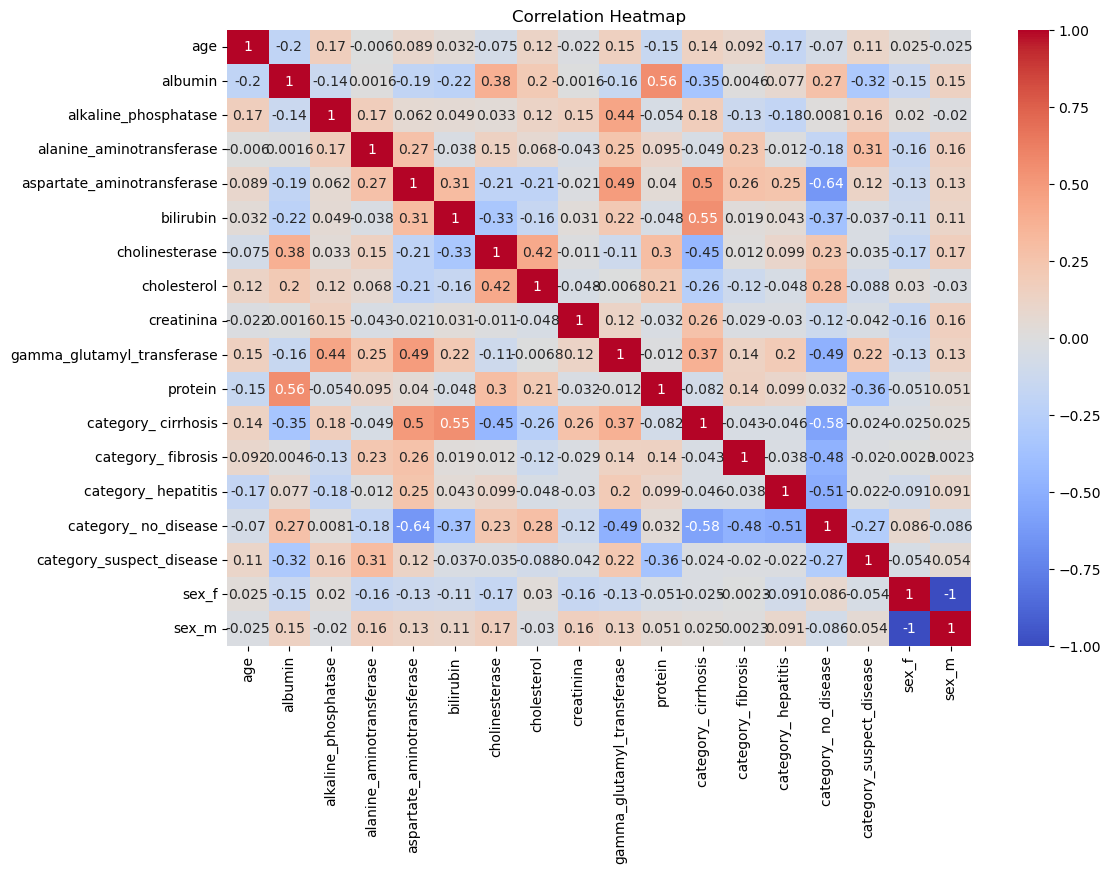

In [22]:
# Convert 'NA    ' to NaN before calculating correlation
data_enc = data_enc.replace('NA    ', np.nan)
data_enc = data_enc.replace('   NA', np.nan) # Addresses any preceeding spaces with NA
# Calculate correlation
corr_matrix = data_enc.corr()
#Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [23]:
# Function to detect and remove outliers using IQR
def treat_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 1st quartile (25%)
    Q3 = df[column].quantile(0.75)  # 3rd quartile (75%)
    IQR = Q3 - Q1                   # Interquartile Range

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQRc
    upper_bound = Q3 + 1.5 * IQR

    # Treat outliers by clipping them to the lower or upper bounds
    df[column] = np.clip(df[column], lower_bound, upper_bound)

# Apply IQR treatment to specific columns (or loop over all numerical columns)
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    treat_outliers_iqr(data, col)

print(data.head())

      category   age sex  albumin  alkaline_phosphatase  \
0   no_disease  32.0   m     38.5                  52.5   
1   no_disease  32.0   m     38.5                  70.3   
2   no_disease  32.0   m     46.9                  74.7   
3   no_disease  32.0   m     43.2                  52.0   
4   no_disease  32.0   m     39.2                  74.1   

   alanine_aminotransferase  aspartate_aminotransferase  bilirubin  \
0                       7.7                       22.10        7.5   
1                      18.0                       24.70        3.9   
2                      36.2                       49.85        6.1   
3                      30.6                       22.60       18.9   
4                      32.6                       24.80        9.6   

   cholinesterase  cholesterol  creatinina  gamma_glutamyl_transferase  \
0            6.93         3.23       106.0                        12.1   
1           11.17         4.80        74.0                        15.6   
2 

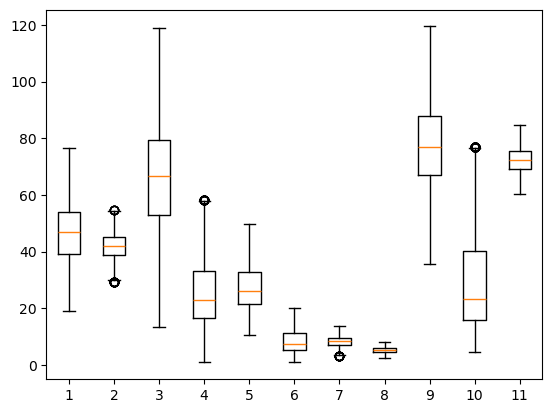

In [24]:
# Box plot to detect outliers
data_box = data.select_dtypes(include=np.number).dropna()
plt.boxplot(data_box)
plt.show()

In [25]:
# Calculate Z-scores for all numerical columns
from scipy.stats import zscore
z_scores = np.abs(data.select_dtypes(include=['float64', 'int64']).apply(zscore))

# Define a threshold for outliers (e.g., 3 standard deviations)
threshold = 3

# Filter rows with any column having Z-score > threshold
outliers = data[(z_scores > threshold).any(axis=1)]
print("Outliers detected:\n", outliers)

# Option 1: Remove outliers
df_cleaned = data[(z_scores <= threshold).all(axis=1)]

# Option 2: Replace outliers with the column mean
df_replaced = data.copy()
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    mean_value = data[col].mean()
    df_replaced[col] = np.where(z_scores[col] > threshold, mean_value, data[col])

print("Cleaned DataFrame:\n", df_cleaned.head())
print("DataFrame with Replaced Outliers:\n", df_replaced.head())#

Outliers detected:
 Empty DataFrame
Columns: [category, age, sex, albumin, alkaline_phosphatase, alanine_aminotransferase, aspartate_aminotransferase, bilirubin, cholinesterase, cholesterol, creatinina, gamma_glutamyl_transferase, protein]
Index: []
Cleaned DataFrame:
 Empty DataFrame
Columns: [category, age, sex, albumin, alkaline_phosphatase, alanine_aminotransferase, aspartate_aminotransferase, bilirubin, cholinesterase, cholesterol, creatinina, gamma_glutamyl_transferase, protein]
Index: []
DataFrame with Replaced Outliers:
       category   age sex  albumin  alkaline_phosphatase  \
0   no_disease  32.0   m     38.5                  52.5   
1   no_disease  32.0   m     38.5                  70.3   
2   no_disease  32.0   m     46.9                  74.7   
3   no_disease  32.0   m     43.2                  52.0   
4   no_disease  32.0   m     39.2                  74.1   

   alanine_aminotransferase  aspartate_aminotransferase  bilirubin  \
0                       7.7             

In [26]:
# Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
array = data_enc.values
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array)
#Transformed data
set_printoptions(precision=2)
print(rescaledX[0:5:])

[[0.22 0.35 0.1  0.02 0.04 0.03 0.37 0.22 0.09 0.01 0.54 0.   0.   0.
  1.   0.   0.   1.  ]
 [0.22 0.35 0.15 0.05 0.04 0.01 0.65 0.41 0.06 0.02 0.7  0.   0.   0.
  1.   0.   0.   1.  ]
 [0.22 0.48 0.16 0.11 0.13 0.02 0.49 0.46 0.07 0.04 0.76 0.   0.   0.
  1.   0.   0.   1.  ]
 [0.22 0.42 0.1  0.09 0.04 0.07 0.39 0.4  0.07 0.05 0.68 0.   0.   0.
  1.   0.   0.   1.  ]
 [0.22 0.36 0.15 0.1  0.05 0.03 0.52 0.35 0.06 0.04 0.53 0.   0.   0.
  1.   0.   0.   1.  ]]


In [27]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
array = data_enc.values
scaler = StandardScaler().fit(array)
scaled_data = scaler.fit_transform(data_enc)

rescaledX = scaler.transform(array)
# Summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5:])

[[-1.53 -0.54 -0.62 -0.82 -0.38 -0.2  -0.57 -1.9   0.5  -0.5  -0.56 -0.23
  -0.19 -0.2   0.39 -0.11 -0.79  0.79]
 [-1.53 -0.54  0.08 -0.41 -0.31 -0.38  1.35 -0.51 -0.15 -0.44  0.83 -0.23
  -0.19 -0.2   0.39 -0.11 -0.79  0.79]
 [-1.53  0.91  0.25  0.3   0.54 -0.27  0.29 -0.15  0.09 -0.12  1.34 -0.23
  -0.19 -0.2   0.39 -0.11 -0.79  0.79]
 [-1.53  0.27 -0.64  0.08 -0.37  0.38 -0.39 -0.56 -0.03 -0.1   0.68 -0.23
  -0.19 -0.2   0.39 -0.11 -0.79  0.79]
 [-1.53 -0.42  0.23  0.16 -0.3  -0.09  0.43 -0.93 -0.11 -0.18 -0.62 -0.23
  -0.19 -0.2   0.39 -0.11 -0.79  0.79]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Model Building

In [28]:
import pandas as pd

# Check for NaN values
data = data.dropna()
data_enc = data_enc.dropna()
scaled_data = pd.DataFrame(scaled_data).dropna().values
print(data.isna().sum())
print(data_enc.isna().sum())

category                      0
age                           0
sex                           0
albumin                       0
alkaline_phosphatase          0
alanine_aminotransferase      0
aspartate_aminotransferase    0
bilirubin                     0
cholinesterase                0
cholesterol                   0
creatinina                    0
gamma_glutamyl_transferase    0
protein                       0
dtype: int64
age                           0
albumin                       0
alkaline_phosphatase          0
alanine_aminotransferase      0
aspartate_aminotransferase    0
bilirubin                     0
cholinesterase                0
cholesterol                   0
creatinina                    0
gamma_glutamyl_transferase    0
protein                       0
category_ cirrhosis           0
category_ fibrosis            0
category_ hepatitis           0
category_ no_disease          0
category_suspect_disease      0
sex_f                         0
sex_m                      

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define features (X) and target variable (y)
X = data.drop(['category', 'sex'], axis=1)  # Replace 'target_variable' with your target column name
y = data['category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [30]:
# Predictions on the test set
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

Accuracy: 0.9106
Precision: 0.9347
Recall: 0.9106
F1-Score: 0.9181


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


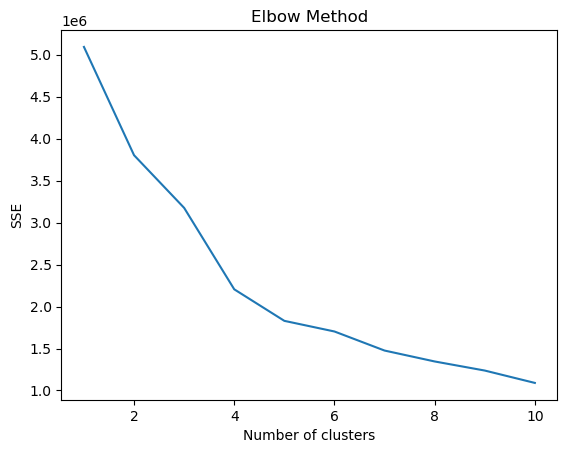

In [31]:
## K-Means Clustering
# Elbow method to find optimal K
from sklearn.cluster import KMeans, DBSCAN
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_enc)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [32]:
# Fit K-Means with optimal K
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

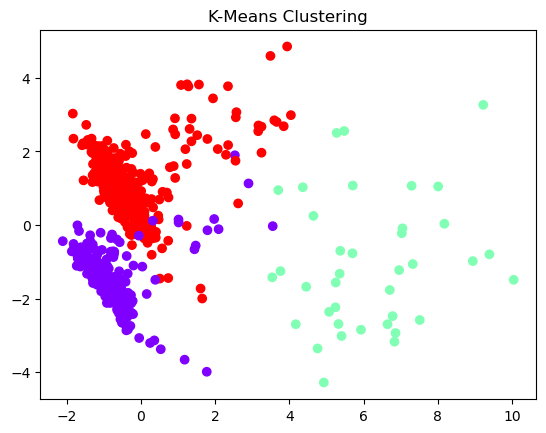

In [33]:
# Visualizing K-Means Clustering Results
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='rainbow')
plt.title('K-Means Clustering')
plt.show()

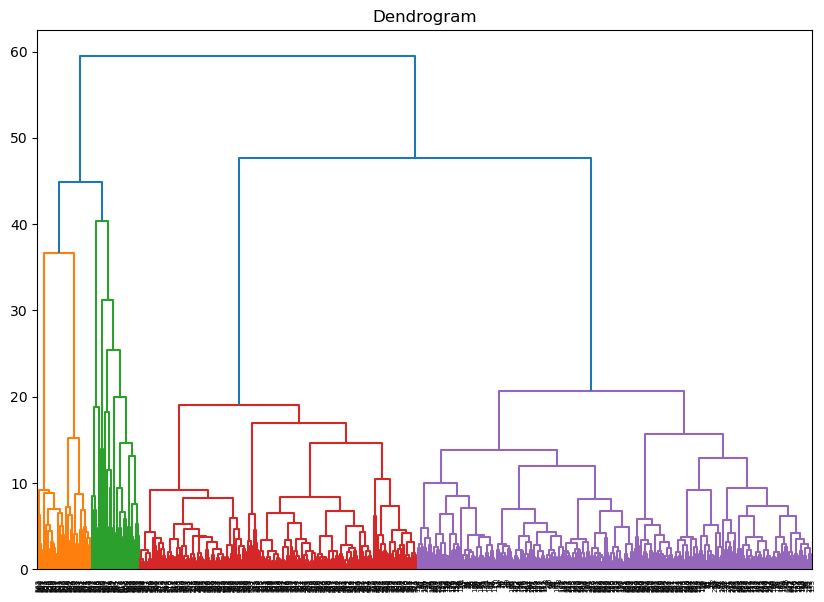

In [34]:
# Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.show()

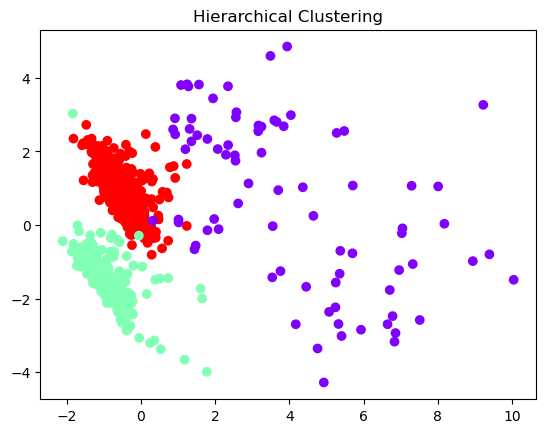

In [36]:
# Create clusters from Hierarchical Clustering
hier_labels = fcluster(Z, t=3, criterion='maxclust')
# Visualizing Hierarchical Clustering Results
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=hier_labels, cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.show()

In [37]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.8, min_samples=3)
dbscan_labels = dbscan.fit_predict(scaled_data)
dbscan_labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1,  1

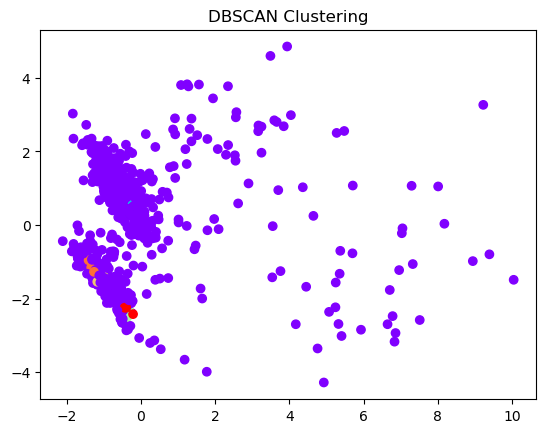

In [38]:
# Visualizing DBSCAN Clustering Results
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.show()

In [39]:
# 4. Cluster Analysis
# Compare the number of points in each cluster for each method
print("K-Means Cluster Distribution:", np.bincount(kmeans_labels))
print("Hierarchical Cluster Distribution:", np.bincount(hier_labels))

# Filter out noise points (-1 labels) from DBSCAN results
dbscan_clusters = dbscan_labels[dbscan_labels != -1]
print("DBSCAN Cluster Distribution (excluding noise):", np.bincount(dbscan_clusters))

# You might also want to print the number of noise points
print("DBSCAN Noise Points:", (dbscan_labels == -1).sum())

K-Means Cluster Distribution: [226  38 350]
Hierarchical Cluster Distribution: [  0  81 220 313]
DBSCAN Cluster Distribution (excluding noise): [3 3 5 4 4 3 3]
DBSCAN Noise Points: 589


In [40]:
dbscan_labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1,  1

In [41]:
# Evaluation
# Calculate Silhouette Score for each algorithm
from sklearn.metrics import silhouette_score
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
hier_silhouette = silhouette_score(scaled_data, hier_labels)
dbscan_silhouette = silhouette_score(scaled_data, dbscan_labels)

print("K-Means Silhouette Score:", kmeans_silhouette)
print("Hierarchical Silhouette Score:", hier_silhouette)
print("DBSCAN Silhouette Score:", dbscan_silhouette)

K-Means Silhouette Score: 0.2281470694422692
Hierarchical Silhouette Score: 0.23881761445774674
DBSCAN Silhouette Score: -0.426260877990932


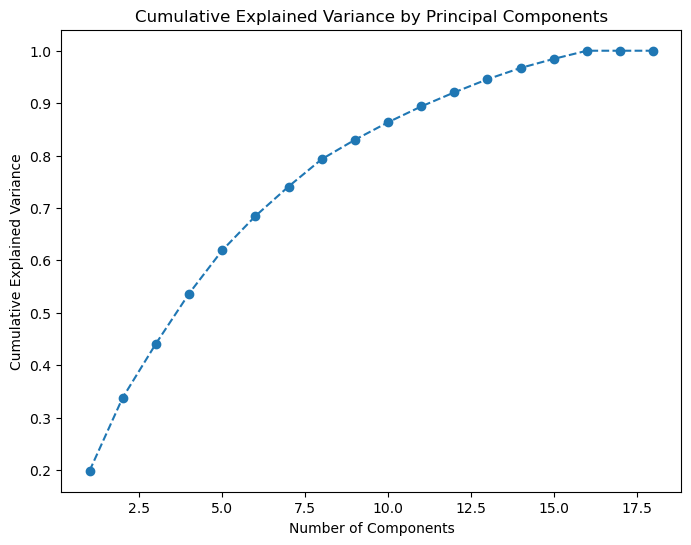

In [42]:
#Implement PCA
from sklearn.decomposition import PCA

# Fit PCA
pca = PCA()
pca.fit(scaled_data)

# Scree plot to determine optimal number of components
plt.figure(figsize=(8,6))
plt.plot(range(1, scaled_data.shape[1]+1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [43]:
#Transform the original dataset into principal components
# Choose optimal number of components (e.g., 2)
n_components=2
pca = PCA(n_components=n_components)

# Transformed PCA data
pca_transformed_data = pca.fit_transform(scaled_data)

In [44]:
# Clustering with Heirarchical Clustering and Dendrogram
# Perform Hierarchical Clustering:
from scipy.cluster.hierarchy import dendrogram, linkage

#Perform hierarchical clutering using the 'ward' method
linked = linkage(pca_transformed_data, method='ward')

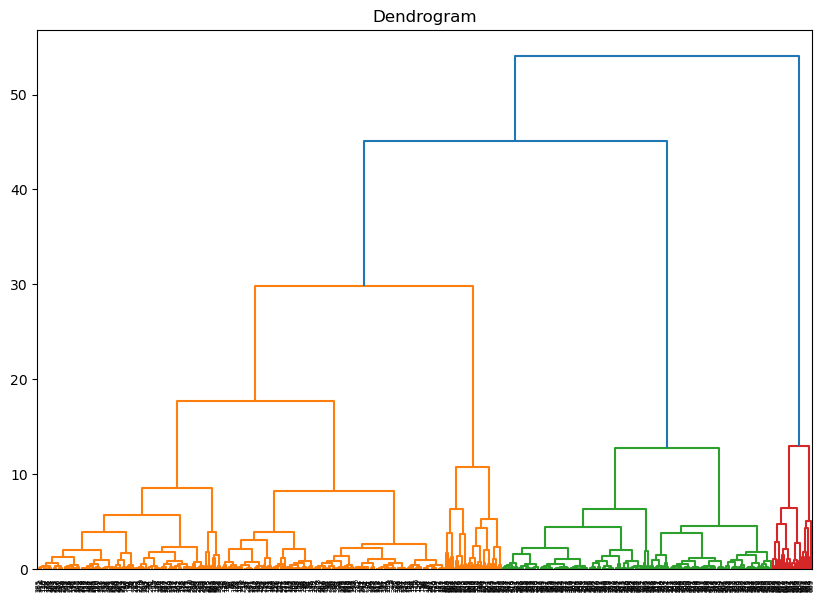

In [45]:
# Visualize the Dendrogram
plt.figure(figsize=(10,7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.show()

In [46]:
# Apply Agglomerative Clustering with the chosen number of clusters:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 3
hc = AgglomerativeClustering(n_clusters, metric='euclidean', linkage='ward')
labels = hc.fit_predict(pca_transformed_data)

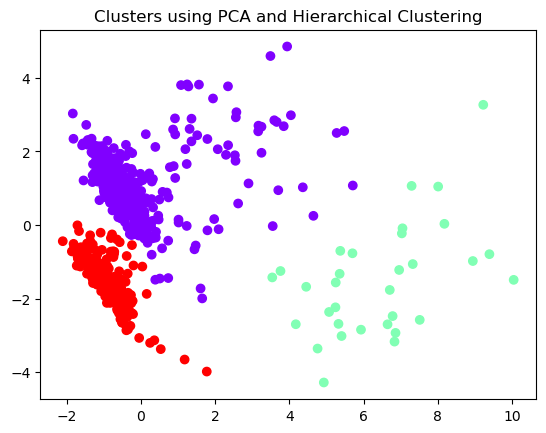

In [47]:
# Visualize Clustering Results:
plt.scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], c=labels, cmap='rainbow')
plt.title('Clusters using PCA and Hierarchical Clustering')
plt.show()

In [48]:
#Apply K-Means clustering on the original dataset
from sklearn.cluster import KMeans

# Apply KMeans to original data
kmeans = KMeans(n_clusters=3)  # Choose number of clusters
kmeans.fit(scaled_data)
data['Cluster'] = kmeans.labels_

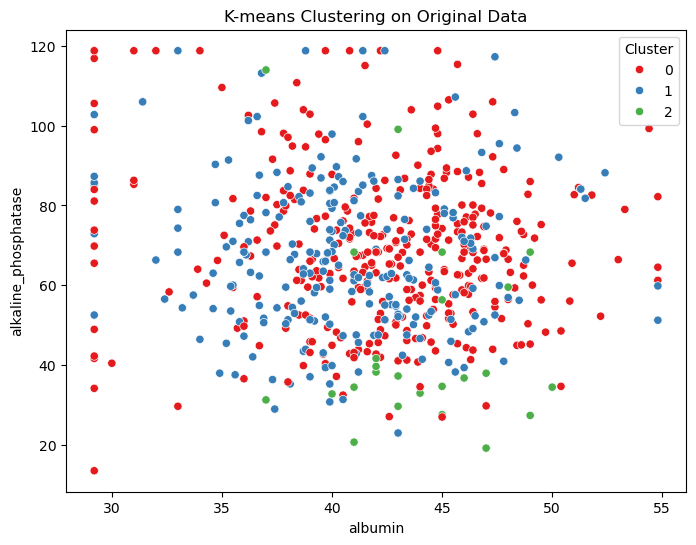

In [49]:
#Visualize clustering results
plt.figure(figsize=(8,6))
sns.scatterplot(x='albumin', y='alkaline_phosphatase', hue='Cluster', data=data, palette='Set1')  # Replace 'Feature1' and 'Feature2'
plt.title('K-means Clustering on Original Data')
plt.show()

In [50]:
# Evaluate clustering performance
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette_avg = silhouette_score(scaled_data, data['Cluster'])
davies_bouldin = davies_bouldin_score(scaled_data, data['Cluster'])

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin}')

Silhouette Score: 0.21765226867958742
Davies-Bouldin Index: 1.6160398619097662


In [51]:
#Apply K-Means clustering on PCA-transformed dataset
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(pca_transformed_data)
pca_labels = kmeans_pca.labels_

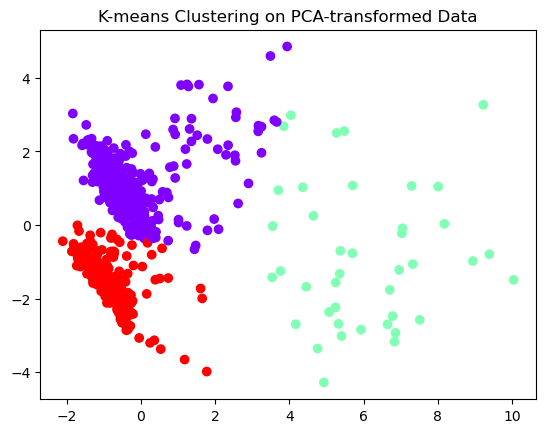

In [52]:
#Visualize clustering results
plt.scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], c=pca_labels, cmap='rainbow')
plt.title('K-means Clustering on PCA-transformed Data')
plt.show()


In [53]:
# Evaluate clustering performance
silhouette_pca = silhouette_score(pca_transformed_data, pca_labels)
davies_bouldin_pca = davies_bouldin_score(pca_transformed_data, pca_labels)

print(f'Silhouette Score (PCA Data): {silhouette_pca}')
print(f'Davies-Bouldin Index (PCA Data): {davies_bouldin_pca}')

Silhouette Score (PCA Data): 0.5346107133248806
Davies-Bouldin Index (PCA Data): 0.6087312188356829


In [54]:
#Compare clustering results from original and PCA-transformed data and perform analysis
print(f'Silhouette Score (Original Data): {silhouette_avg}')
print(f'Silhouette Score (PCA Data): {silhouette_pca}')

print(f'Davies-Bouldin Index (Original Data): {davies_bouldin}')
print(f'Davies-Bouldin Index (PCA Data): {davies_bouldin_pca}')

Silhouette Score (Original Data): 0.21765226867958742
Silhouette Score (PCA Data): 0.5346107133248806
Davies-Bouldin Index (Original Data): 1.6160398619097662
Davies-Bouldin Index (PCA Data): 0.6087312188356829


In [55]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Predict on test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.8861788617886179
Precision: 0.9134465660631893
Recall: 0.8861788617886179
F1 Score: 0.8891687286438081


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [56]:
# Hyperparameter Tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Grid search
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}


In [57]:
# Retrain the model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_best_pred = best_model.predict(X_test)

# Evaluate the optimized model
print("Optimized Accuracy:", accuracy_score(y_test, y_best_pred))

Optimized Accuracy: 0.8943089430894309


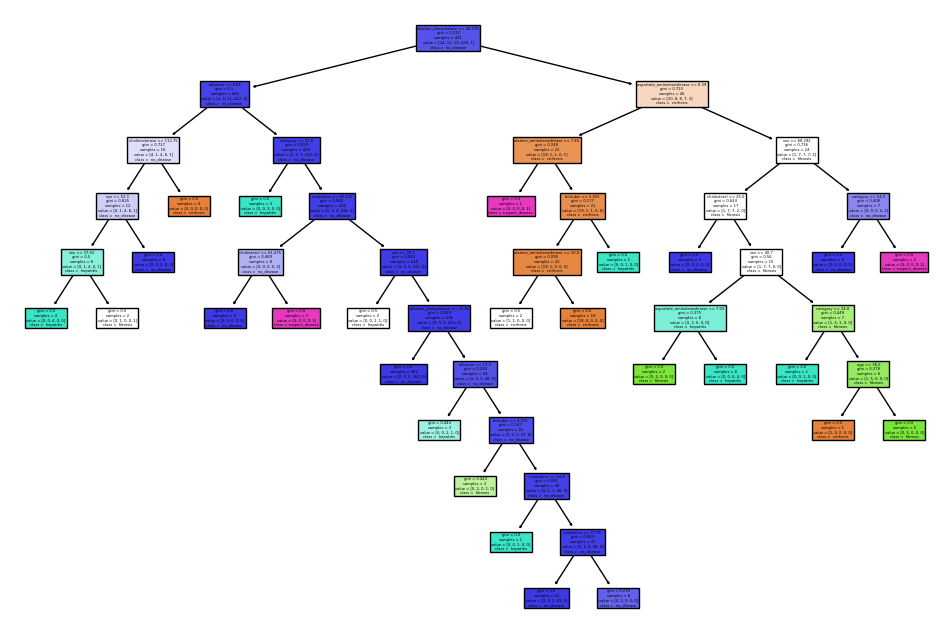

In [58]:
# Visualize the decision tree
from sklearn.tree import plot_tree

# Get unique class labels from your target variable (y_train)
class_names_actual = [str(c) for c in np.unique(y_train)]

plt.figure(figsize=(12,8))
plot_tree(best_model, feature_names=data.columns, class_names=class_names_actual, filled=True)
plt.show()

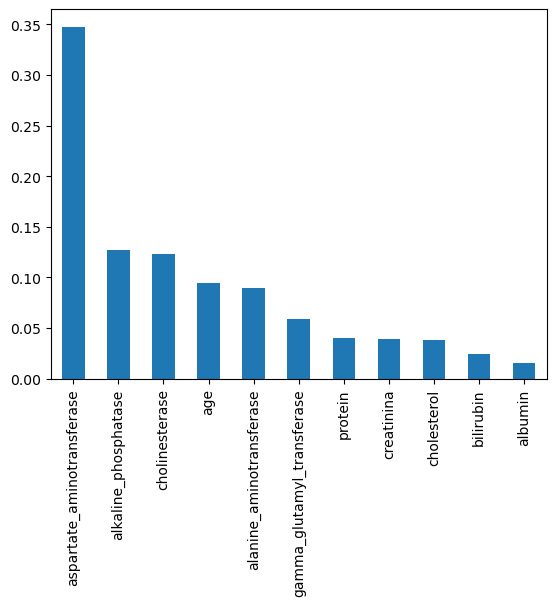

In [59]:
# Identify important features
feature_names = X_train.columns
feature_importances = pd.Series(best_model.feature_importances_, index=feature_names)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.show()

In [60]:
# Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Separate features and target variable
X = data.drop(['category', 'sex'], axis=1)  # Features
y = data['category']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.943089430894309
Precision: 0.9456272319732543
Recall: 0.943089430894309
F1 Score: 0.9404748143622262


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [61]:
# AdaBoost as a Boosting method
from sklearn.ensemble import AdaBoostClassifier

# Create and train the model
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

In [62]:
# Predict and evaluate
y_pred_ada = ada_model.predict(X_test)

# Evaluate the model
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada, average='weighted')
recall_ada = recall_score(y_test, y_pred_ada, average='weighted')
f1_ada = f1_score(y_test, y_pred_ada, average='weighted')

print(f"Accuracy (AdaBoost): {accuracy_ada}")
print(f"Precision (AdaBoost): {precision_ada}")
print(f"Recall (AdaBoost): {recall_ada}")
print(f"F1 Score (AdaBoost): {f1_ada}")

Accuracy (AdaBoost): 0.8943089430894309
Precision (AdaBoost): 0.8734030197444832
Recall (AdaBoost): 0.8943089430894309
F1 Score (AdaBoost): 0.8789045785194695


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [63]:
# LightGBM Model
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import sklearn.model_selection 

# Train the model
lgb_clf = lgb.LGBMClassifier()
lgb_clf.fit(X_train, y_train)

# Predictions
y_pred_lgb = lgb_clf.predict(X_test)

# Metrics
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb, average='weighted')
recall_lgb = recall_score(y_test, y_pred_lgb, average='weighted')
f1_lgb = f1_score(y_test, y_pred_lgb, average='weighted')

print("LightGBM Metrics: ")
print("Accuracy: ", accuracy_lgb)
print("Precision: ", precision_lgb)
print("Recall: ", recall_lgb)
print("F1 score: ", f1_lgb)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1350
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 12
[LightGBM] [Info] Start training from score -3.018390
[LightGBM] [Info] Start training from score -3.711537
[LightGBM] [Info] Start training from score -3.252005
[LightGBM] [Info] Start training from score -0.134987
[LightGBM] [Info] Start training from score -4.250534
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

In [64]:
# XGBoost Model
import xgboost as xgb

#Fit and transform the target variable
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train_encoded=le.fit_transform(y_train)
y_test_encoded=le.transform(y_test)

# Train the model
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train_encoded)

# Predictions
y_pred_xgb = xgb_clf.predict(X_test)

#Before evaluating, invert the encoding to get original labels
y_pred_xgb = le.inverse_transform(y_pred_xgb)

# Metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
#from sklearn.metrics import classification_report

# Generate classification report
#y_pred = best_model.predict(X_test)
#print(classification_report(y_test, y_pred))
#from sklearn.metrics import classification_report

# Generate classification report
#y_pred = best_model.predict(X_test)
#print(classification_report(y_test, y_pred_xgb))


print("XGBoost Metrics: ")
print("Accuracy: ", accuracy_xgb)
print("Precision: ", precision_xgb)
print("Recall: ", recall_xgb)
print("F1 Score: ",f1_xgb)

XGBoost Metrics: 
Accuracy:  0.967479674796748
Precision:  0.9745934959349594
Recall:  0.967479674796748
F1 Score:  0.9708273553323769


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [65]:
# Cross-Validation and Hyperparameter Tuning:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

grid_search_lgb = GridSearchCV(lgb_clf, param_grid, cv=5)
grid_search_lgb.fit(X_train, y_train)

grid_search_xgb = GridSearchCV(xgb_clf, param_grid, cv=5)
grid_search_xgb.fit(X_train, y_train_encoded)

# Best parameters
best_params_lgb = grid_search_lgb.best_params_
best_params_xgb = grid_search_xgb.best_params_

print("Best parameters for LGBM: ",best_params_lgb)
print("Best parameters for XGBoost: ",best_params_xgb)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1038
[LightGBM] [Info] Number of data points in the train set: 392, number of used features: 12
[LightGBM] [Info] Start training from score -2.975530
[LightGBM] [Info] Start training from score -3.774037
[LightGBM] [Info] Start training from score -3.263212
[LightGBM] [Info] Start training from score -0.133531
[LightGBM] [Info] Start training from score -4.361824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [66]:
# Comparison of Performance
results = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [accuracy_lgb, accuracy_xgb],
    'Precision': [precision_lgb, precision_xgb],
    'Recall': [recall_lgb, recall_xgb],
    'F1-Score': [f1_lgb, f1_xgb]
})
print(results)

      Model  Accuracy  Precision   Recall  F1-Score
0  LightGBM   0.96748   0.965464  0.96748  0.965525
1   XGBoost   0.96748   0.974593  0.96748  0.970827


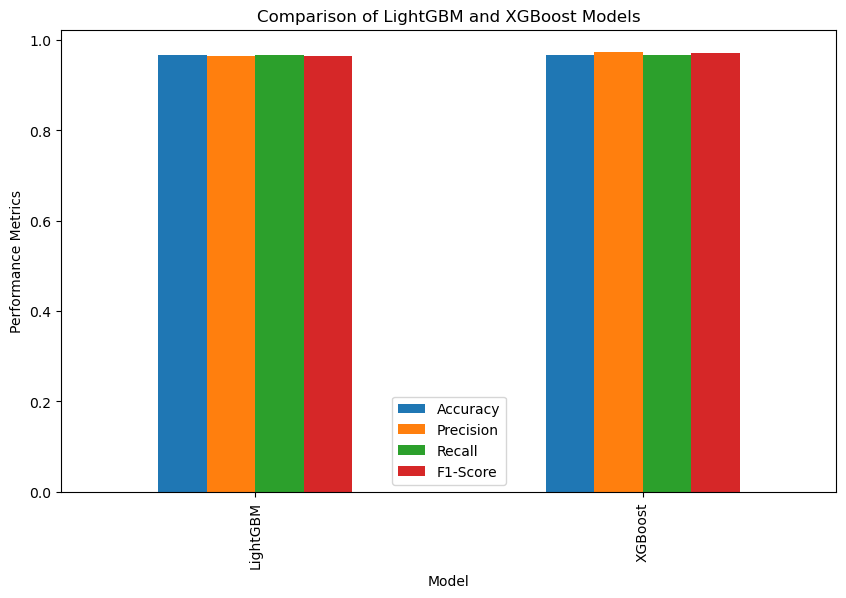

In [67]:
# Visualizing Results
results.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of LightGBM and XGBoost Models')
plt.xlabel('Model')
plt.ylabel('Performance Metrics')
plt.show()

In [68]:
#Implementing K-Nearest Neighbors
# Using scikit-learn to implement the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5) # Start with k=5, tune later

# Train the model
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

In [69]:
# Choosing the appropriate distance metric and value for K
# Example with different distance metrics
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

# Grid search to find optimal K and distance metric
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors' : [3, 5, 7, 9],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

In [70]:
# Evaluation metrics to evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Accuracy: 0.8617886178861789
Precision: 0.8219286359530261
Recall: 0.8617886178861789
F1-score: 0.8405135285024838


In [70]:
# SVM Implementation
# Basic SVM Classifier Implement an SVM classifier using scikit-learn
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize SVM with default parameters
svm_clf = SVC()

# Train the SVM model
svm_clf.fit(X_train, y_train)

# Predictions
y_pred = svm_clf.predict(X_test)

In [71]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.8861788617886179
Precision: 0.8188358874739189
Recall: 0.8861788617886179
F1-Score: 0.8511108613390281


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


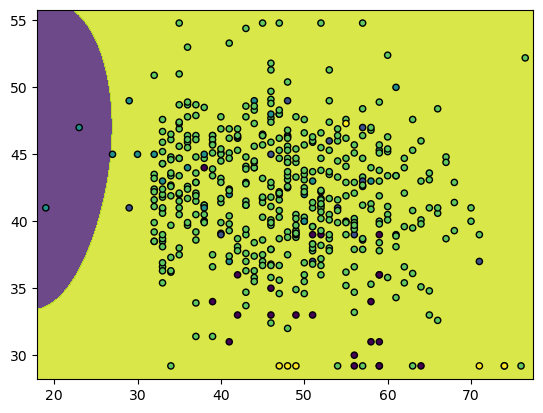

In [72]:
# Visualizations of SVM Results
import numpy as np

# Visualizing decision boundaries for 2D data
def plot_decision_boundary(X, y, model):
  x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
  y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                       np.arange(y_min, y_max, 0.01))
  # Convert y to numerical labels if it's categorical
  if isinstance(y, pd.Series) and y.dtype == 'object':  # Assuming pandas Series for categorical labels
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y_numeric = le.fit_transform(y) # Convert y to numeric using LabelEncoder
  else:
    y_numeric = y  # If y is already numerical

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  # Convert Z to numeric labels if it's categorical
  if isinstance(Z.ravel()[0], str): # Check if Z contains string values
    Z = le.transform(Z.ravel()).reshape(xx.shape) # If string value found, transform them to numeric using the LabelEncoder for consistency

  plt.contourf(xx, yy, Z, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y_numeric, marker='o', edgecolor='k', s=20) # Use numeric labels

# Example with first two features
X_train_2D = X_train.iloc[:, :2].values
svm_clf_2D = SVC()
svm_clf_2D.fit(X_train_2D, y_train)

plot_decision_boundary(X_train_2D, y_train, svm_clf_2D)

In [74]:
# Parameter Tuning and Optimization
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C' : [0.1, 1, 10, 100],
    'kernel' : ['linear', 'poly', 'rbf'],
    'degree' : [2, 3, 4], #For polynomial kernel
    'gamma' : ['scale', 'auto'] #For RBF kernel
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'C': 10, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}


In [75]:
# Comapring the performance of SVM models with different Kernels
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
  svm_clf = SVC(kernel=kernel)
  svm_clf.fit(X_train, y_train)
  y_pred = svm_clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Kernel: {kernel}, Accuracy:{accuracy}")

Kernel: linear, Accuracy:0.8943089430894309
Kernel: poly, Accuracy:0.9024390243902439
Kernel: rbf, Accuracy:0.8861788617886179


In [73]:
import pickle

# Save the trained model
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_clf, f)

In [75]:
print(X_train.head())
print(y_train.head())

      age  albumin  alkaline_phosphatase  alanine_aminotransferase  \
83   39.0     36.6                  71.3                    28.900   
90   39.0     45.8                  62.5                    20.700   
227  53.0     38.7                 104.0                    58.025   
482  54.0     39.9                  30.7                    17.000   
464  52.0     45.5                  78.2                    25.200   

     aspartate_aminotransferase  bilirubin  cholinesterase  cholesterol  \
83                         25.9       6.10            5.70         4.66   
90                         22.8      20.05            8.61         4.78   
227                        34.3       7.80            8.07         4.60   
482                        19.3       6.30            6.99         4.95   
464                        27.7       4.70            8.65         6.04   

     creatinina  gamma_glutamyl_transferase  protein  Cluster  
83         77.0                        22.6     66.3        0  
